In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json
from scipy.stats import gaussian_kde

from ler.rates import LeR

## data generation

In [32]:
# data generation
ler = LeR(
    event_type="BBH",
    verbose=False, 
    # geocent_time_min=1126259462.4,
    # geocent_time_max=1126259462.4+365*24*3600*10,
    )

In [33]:
lensed_params = ler.lensed_cbc_statistics(size=100000, save_batch=False, resume=False);

lensed params will be store in lensed_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3477.98it/s]


Invalid sample found. Resampling 1 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.79s/it]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3598.75it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param.json...


In [5]:
lensed_params.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

In [6]:
lensed_params['effective_geocent_time']

array([[1.24691669e+09, 1.24850370e+09,            nan,            nan],
       [1.25656771e+09, 1.26488262e+09,            nan,            nan],
       [1.25780566e+09, 1.26529492e+09, 1.26575530e+09,            nan],
       ...,
       [1.26837975e+09, 1.28075697e+09,            nan,            nan],
       [1.24056903e+09, 1.25092991e+09,            nan,            nan],
       [1.24655942e+09, 1.24888483e+09, 1.25515211e+09, 1.25967988e+09]])

In [7]:
lensed_params['time_delays']

array([[       0.        ,  1587013.23152951,               nan,
                      nan],
       [       0.        ,  8314919.02428524,               nan,
                      nan],
       [       0.        ,  7489262.52480469,  7949641.35643128,
                      nan],
       ...,
       [       0.        , 12377217.08314343,               nan,
                      nan],
       [       0.        , 10360883.40873346,               nan,
                      nan],
       [       0.        ,  2325404.81244814,  8592689.99144925,
        13120458.02389286]])

In [19]:
12377217.08314343/ (24*3600)

143.2548273511971

In [11]:
import lenstronomy
lenstronomy.__version__

'1.11.5'

In [6]:
# 2 or more image detectable 
lensed_params = ler.selecting_n_lensed_detectable_events(
    size=1000,
    batch_size=50000,
    snr_threshold=8,
    num_img=2,
    resume=False,
    output_jsonfile="n_lensed_params_bbh.json",
    meta_data_file="meta_data_lensed_bbh.json",
)

collected number of events =  0


100%|███████████████████████████████████████████████████████| 50000/50000 [00:15<00:00, 3221.21it/s]


collected number of events =  213
total number of events =  50000
total lensed rate (yr^-1): 1.0580120390407721


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3381.07it/s]


collected number of events =  448
total number of events =  100000
total lensed rate (yr^-1): 1.1126511584278542


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3481.12it/s]


collected number of events =  682
total number of events =  150000
total lensed rate (yr^-1): 1.1292084673330307


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  865
total number of events =  200000
total lensed rate (yr^-1): 1.074155415223319


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]


collected number of events =  1074
total number of events =  250000
total lensed rate (yr^-1): 1.0669529858495674
storing detectable lensed params in ./ler_data/n_lensed_params_bbh.json

 trmming final result to size=1000


In [25]:
lensed_params = ler.selecting_n_lensed_detectable_events(
    size=10000,
    batch_size=50000,
    snr_threshold=8,
    num_img=4,
    resume=False,
    output_jsonfile="n_lensed_params_bbh_4img.json",
    meta_data_file="meta_data_lensed_bbh_4img.json",
)

collected number of events =  0


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3444.55it/s]


collected number of events =  20
total number of events =  50000
total lensed rate (yr^-1): 0.09934385343105842


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3518.47it/s]


collected number of events =  42
total number of events =  100000
total lensed rate (yr^-1): 0.10431104610261133


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]


collected number of events =  60
total number of events =  150000
total lensed rate (yr^-1): 0.09934385343105842


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3475.17it/s]


collected number of events =  78
total number of events =  200000
total lensed rate (yr^-1): 0.09686025709528195


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]


collected number of events =  93
total number of events =  250000
total lensed rate (yr^-1): 0.09238978369088433


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  111
total number of events =  300000
total lensed rate (yr^-1): 0.09189306442372903


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]


collected number of events =  131
total number of events =  350000
total lensed rate (yr^-1): 0.09295746285334751


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  153
total number of events =  400000
total lensed rate (yr^-1): 0.09499755984344961


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3635.50it/s]


collected number of events =  168
total number of events =  450000
total lensed rate (yr^-1): 0.09272092986898785


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  187
total number of events =  500000
total lensed rate (yr^-1): 0.09288650295803962


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it]


collected number of events =  202
total number of events =  550000
total lensed rate (yr^-1): 0.09121571996851728


  0%|                                                                     | 0/50000 [00:00<?, ?it/s]


KeyboardInterrupt: 

## 2-image case

In [35]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/lensed_param.json")
# lensed_params_detectable = get_param_from_json("ler_data/n_lensed_params_bbh.json")

In [36]:
lensed_params_detectable.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

In [40]:
# select according to arrival time
dt_eff = lensed_params_detectable['time_delays']

dt12 = abs(dt_eff[:,1]-dt_eff[:,0])/ (24*3600)
dt13 = abs(dt_eff[:,2]-dt_eff[:,0])/ (24*3600)
dt14 = abs(dt_eff[:,3]-dt_eff[:,0])/ (24*3600)
# dt12 = abs(dt_eff[:,1]-dt_eff[:,0])
# dt13 = abs(dt_eff[:,2]-dt_eff[:,0])
# dt14 = abs(dt_eff[:,3]-dt_eff[:,0])

# select only detectable
snr_l = lensed_params_detectable['optimal_snr_net']
dt12 = dt12[snr_l[:,1]>8]
dt13 = dt13[snr_l[:,2]>8]
dt14 = dt14[snr_l[:,3]>8]

# select only non-nan values
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]

log_t12 = np.log10(dt12)
log_t13 = np.log10(dt13)
log_t14 = np.log10(dt14)

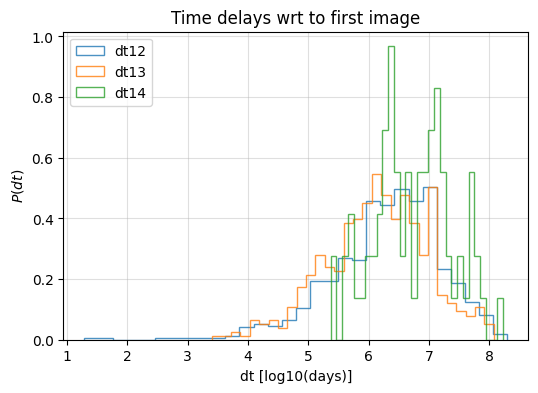

In [38]:
# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_t12, bins=30, alpha=0.8, label='dt12', density=True, histtype='step')
plt.hist(log_t13, bins=30, alpha=0.8, label='dt13', density=True, histtype='step')
plt.hist(log_t14, bins=30, alpha=0.8, label='dt14', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image')
plt.show()

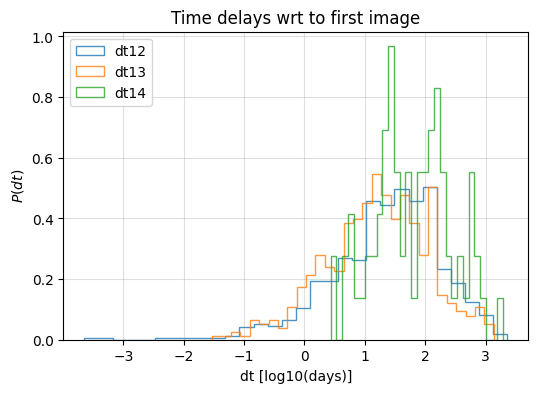

In [41]:
# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_t12, bins=30, alpha=0.8, label='dt12', density=True, histtype='step')
plt.hist(log_t13, bins=30, alpha=0.8, label='dt13', density=True, histtype='step')
plt.hist(log_t14, bins=30, alpha=0.8, label='dt14', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image')
plt.show()

In [19]:
from sklearn.neighbors import KernelDensity

kde_log_t12 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t12).reshape(-1,1))
kde_log_t13 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t13).reshape(-1,1))
kde_log_t14 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(log_t14).reshape(-1,1))

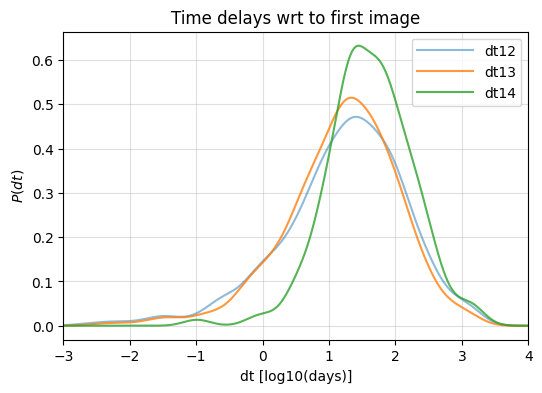

In [20]:
# plot
plt.figure(figsize=(6,4))
dt_log = np.linspace(-3, 4, 1000)
plt.plot(dt_log, np.exp(kde_log_t12.score_samples(dt_log.reshape(-1,1))), label='dt12', color='C0', linestyle='-', alpha=0.5)
plt.plot(dt_log, np.exp(kde_log_t13.score_samples(dt_log.reshape(-1,1))), label='dt13', color='C1', linestyle='-', alpha=0.8)
plt.plot(dt_log, np.exp(kde_log_t14.score_samples(dt_log.reshape(-1,1))), label='dt14', color='C2', linestyle='-', alpha=0.8)

plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image')
leg = plt.legend(handlelength=4)
for line in leg.get_lines():
    line.set_linewidth(1.5)
plt.grid(alpha=0.4)
plt.xlim(-3, 4)
#plt.savefig("redshift_distribution_bns.png")
plt.show()

In [ ]:
# corner plots
# check correlation

In [25]:
# time delays according to image type difference
# dn0 for [typeI,typeI] or [typeII,typeII]
# dn90 for [typeI,typeII] or [typeI,typeII]
img_type = lensed_params_detectable['image_type']
dt_eff = lensed_params_detectable['effective_geocent_time']
snr_l = lensed_params_detectable['optimal_snr_net']

In [29]:
dt0 = []
dt90 = []
list_idx = np.array([[0,1],
                  [0,2],
                  [0,3],
                  [1,2],
                  [1,3],
                  [2,3],])

for j in range(len(img_type)):
    for idx in list_idx:
        dn = abs(img_type[j][idx[0]]-img_type[j][idx[1]])
        snr1 = snr_l[j][idx[0]]
        snr2 = snr_l[j][idx[1]]

        if dn==0 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt0.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
        if dn==1 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt90.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))

dt0 = np.array(dt0)
dt90 = np.array(dt90)
            

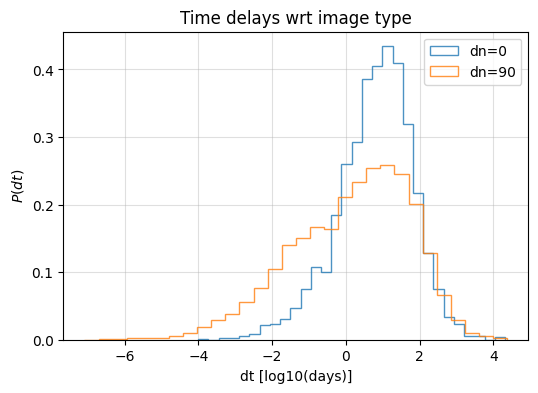

In [31]:
log_dt0 = np.log10(dt0)
log_dt90 = np.log10(dt90)

# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_dt0, bins=30, alpha=0.8, label='dn=0', density=True, histtype='step')
plt.hist(log_dt90, bins=30, alpha=0.8, label='dn=90', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt image type')
plt.show()

## 4-image case

In [26]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_params_bbh_4img.json")

In [27]:
# select according to arrival time
dt_eff = lensed_params_detectable['effective_geocent_time']

dt12 = abs(dt_eff[:,1]-dt_eff[:,0])/ (24*3600)
dt13 = abs(dt_eff[:,2]-dt_eff[:,0])/ (24*3600)
dt14 = abs(dt_eff[:,3]-dt_eff[:,0])/ (24*3600)

# select only detectable
snr_l = lensed_params_detectable['optimal_snr_net']
dt12 = dt12[snr_l[:,1]>8]
dt13 = dt13[snr_l[:,2]>8]
dt14 = dt14[snr_l[:,3]>8]

# select only non-nan values
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]

log_t12 = np.log10(dt12)
log_t13 = np.log10(dt13)
log_t14 = np.log10(dt14)

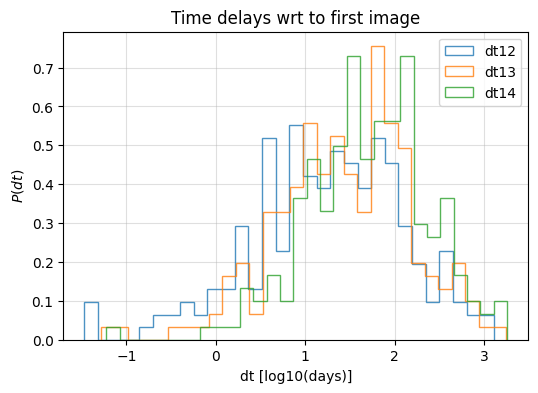

In [28]:
# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_t12, bins=30, alpha=0.8, label='dt12', density=True, histtype='step')
plt.hist(log_t13, bins=30, alpha=0.8, label='dt13', density=True, histtype='step')
plt.hist(log_t14, bins=30, alpha=0.8, label='dt14', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image')
plt.show()

In [29]:
# time delays according to image type difference
# dn0 for [typeI,typeI] or [typeII,typeII]
# dn90 for [typeI,typeII] or [typeI,typeII]
img_type = lensed_params_detectable['image_type']
dt_eff = lensed_params_detectable['effective_geocent_time']
snr_l = lensed_params_detectable['optimal_snr_net']

In [30]:
dt0 = []
dt90 = []
list_idx = np.array([[0,1],
                  [0,2],
                  [0,3],
                  [1,2],
                  [1,3],
                  [2,3],])

for j in range(len(img_type)):
    for idx in list_idx:
        dn = abs(img_type[j][idx[0]]-img_type[j][idx[1]])
        snr1 = snr_l[j][idx[0]]
        snr2 = snr_l[j][idx[1]]

        if dn==0 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt0.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))
        if dn==1 and snr1>8 and snr2>8:
            # tye I-I, II-II
            dt90.append(abs(dt_eff[j][idx[0]]-dt_eff[j][idx[1]])/ (24*3600))

dt0 = np.array(dt0)
dt90 = np.array(dt90)
            

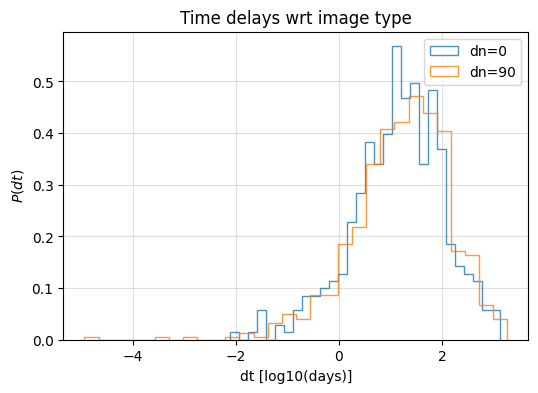

In [31]:
log_dt0 = np.log10(dt0)
log_dt90 = np.log10(dt90)

# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_dt0, bins=30, alpha=0.8, label='dn=0', density=True, histtype='step')
plt.hist(log_dt90, bins=30, alpha=0.8, label='dn=90', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt image type')
plt.show()